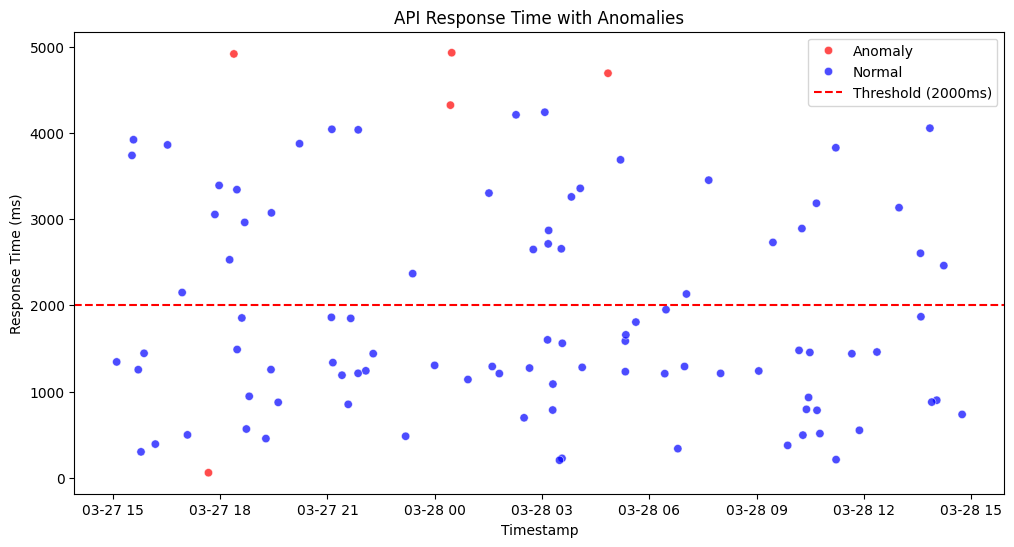

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_json("dummy_api_logs.json")  # Update path if needed

# Convert timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Features for anomaly detection
features = ["response_time_ms"]
scaler = StandardScaler()
df["response_time_scaled"] = scaler.fit_transform(df[features])

# Train Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df["anomaly_score"] = model.fit_predict(df[["response_time_scaled"]])

# Mark anomalies (-1 = anomaly, 1 = normal)
df["is_anomaly"] = df["anomaly_score"].apply(lambda x: "Anomaly" if x == -1 else "Normal")

# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="timestamp", y="response_time_ms", hue="is_anomaly", palette={"Normal": "blue", "Anomaly": "red"}, alpha=0.7)
plt.axhline(y=2000, color='red', linestyle='dashed', label="Threshold (2000ms)")
plt.xlabel("Timestamp")
plt.ylabel("Response Time (ms)")
plt.title("API Response Time with Anomalies")
plt.legend()
plt.show()

In [9]:
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta

# Generate timestamps
np.random.seed(42)
timestamps = [datetime.now() - timedelta(seconds=i * 5) for i in range(1000)]  # 5-second intervals

# Generate random response times
response_times = np.random.normal(loc=500, scale=100, size=1000).astype(int)

# Inject response time anomalies
anomaly_indices = np.random.choice(range(1000), size=30, replace=False)
response_times[anomaly_indices] = np.random.randint(2000, 5000, size=30)

# Create DataFrame
df_logs = pd.DataFrame({"timestamp": timestamps, "response_time_ms": response_times})

# Compute request count per minute
df_logs["minute"] = df_logs["timestamp"].dt.floor("T")
df_request_counts = df_logs.groupby("minute").size().reset_index(name="request_count")

# Merge request count back into logs
df_logs = df_logs.merge(df_request_counts, on="minute", how="left")

# Save as JSON
df_logs.to_json("new_api_logs_with_requests.json", orient="records", date_format="iso")

print("✅ New test API logs generated with request volume: 'new_api_logs_with_requests.json'")

✅ New test API logs generated with request volume: 'new_api_logs_with_requests.json'


In [10]:
from sklearn.ensemble import IsolationForest
import pandas as pd

# Load the logs
df_logs = pd.read_json("new_api_logs_with_requests.json")

# Convert timestamp
df_logs["timestamp"] = pd.to_datetime(df_logs["timestamp"])

# Select features (response time + request count)
features = df_logs[["response_time_ms", "request_count"]]

# Train Isolation Forest
model = IsolationForest(contamination=0.02, random_state=42)
df_logs["anomaly"] = model.fit_predict(features)

# Label anomalies (-1 means anomaly)
df_logs["is_anomaly"] = df_logs["anomaly"] == -1

# Save detected anomalies
df_logs.to_json("detected_anomalies.json", orient="records", date_format="iso")

print("✅ Model trained & anomalies detected. Saved in 'detected_anomalies.json'")


✅ Model trained & anomalies detected. Saved in 'detected_anomalies.json'


In [11]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Load new logs
df_test = pd.read_json("new_api_logs_with_requests.json")

# Convert timestamp
df_test["timestamp"] = pd.to_datetime(df_test["timestamp"])

# Load trained model (retrain on full dataset)
features = df_test[["response_time_ms", "request_count"]]
model = IsolationForest(contamination=0.02, random_state=42)
df_test["anomaly"] = model.fit_predict(features)

# Label anomalies (-1 means anomaly)
df_test["is_anomaly"] = df_test["anomaly"] == -1

# Display some anomalies
print(df_test[df_test["is_anomaly"]].head(10))

# Save results
df_test.to_json("test_anomalies.json", orient="records", date_format="iso")

print("✅ Testing complete! Detected anomalies saved in 'test_anomalies.json'")


                  timestamp  response_time_ms                   minute  \
0   2025-03-28 20:42:21.042               549  2025-03-28T20:42:00.000   
1   2025-03-28 20:42:16.042               486  2025-03-28T20:42:00.000   
2   2025-03-28 20:42:11.042               564  2025-03-28T20:42:00.000   
3   2025-03-28 20:42:06.042               652  2025-03-28T20:42:00.000   
4   2025-03-28 20:42:01.042               476  2025-03-28T20:42:00.000   
40  2025-03-28 20:39:01.042              2671  2025-03-28T20:39:00.000   
90  2025-03-28 20:34:51.042              2164  2025-03-28T20:34:00.000   
169 2025-03-28 20:28:16.042              4361  2025-03-28T20:28:00.000   
198 2025-03-28 20:25:51.043              2943  2025-03-28T20:25:00.000   
224 2025-03-28 20:23:41.043              4539  2025-03-28T20:23:00.000   

     request_count  anomaly  is_anomaly  
0                5       -1        True  
1                5       -1        True  
2                5       -1        True  
3                